### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt, pydotplus 
%matplotlib inline

import math

In [2]:
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from pylab import rcParams

### Load Dataset

In [3]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)

In [4]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print("# of passesngers in original data: " + str(titanic.shape))

# of passesngers in original data: (891, 12)


### Analysing Data

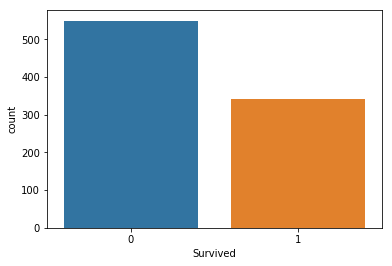

In [6]:
sns.countplot(x="Survived", data = titanic)

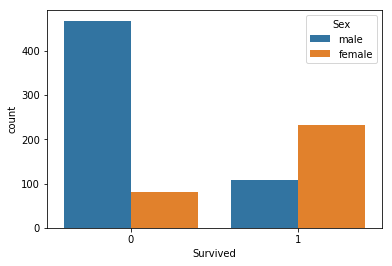

In [7]:
sns.countplot(x="Survived", hue="Sex" , data = titanic)

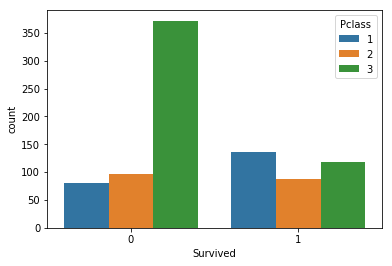

In [8]:
sns.countplot(x="Survived", hue="Pclass" , data = titanic)

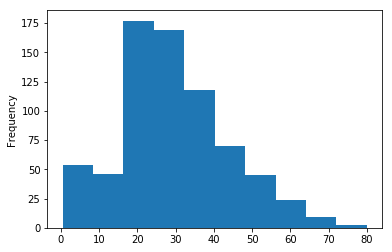

In [9]:
titanic["Age"].plot.hist()

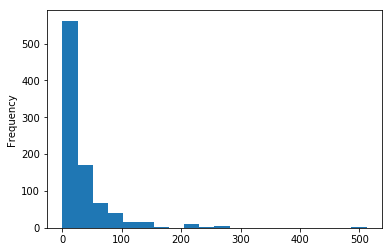

In [10]:
titanic["Fare"].plot.hist(bins=20)

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


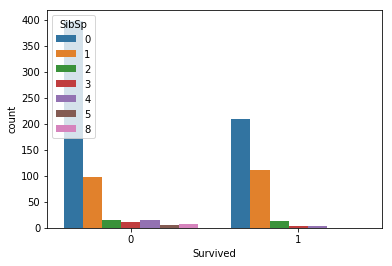

In [12]:
sns.countplot(x="Survived", hue="SibSp" , data = titanic)

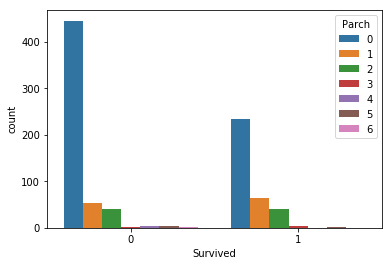

In [13]:
sns.countplot(x="Survived", hue="Parch" , data = titanic)

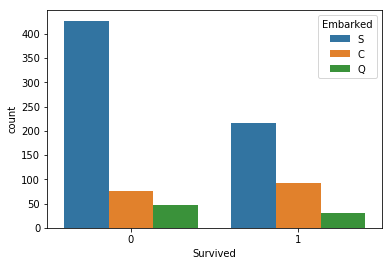

In [14]:
sns.countplot(x="Survived", hue="Embarked" , data = titanic)

### Data Wrangling. 
Clean the data by removing the nan values and unnessary columns in dataset.

In [15]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

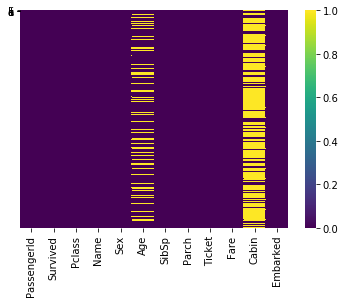

In [17]:
sns.heatmap(titanic.isnull(), yticklabels="False", cmap ="viridis")

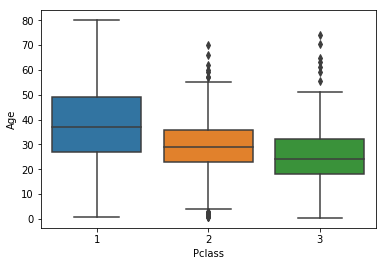

In [18]:
sns.boxplot(x="Pclass", y="Age", data=titanic)

In [19]:
titanic.drop("Cabin", axis=1, inplace=True)

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
titanic.dropna(inplace=True)

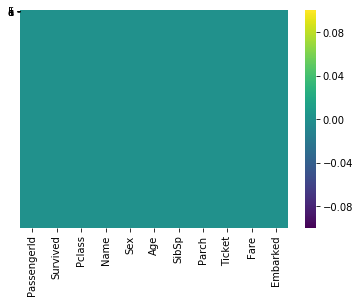

In [22]:
sns.heatmap(titanic.isnull(), yticklabels="False", cmap ="viridis")

In [23]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True) 

In [25]:
sex

,male
0,1
1,0
2,0
3,0
4,1
6,1
7,1
8,0
9,0
10,0


In [26]:
embark = pd.get_dummies(titanic['Embarked'], drop_first=True) 

In [27]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
6,0,1
7,0,1
8,0,1
9,0,0
10,0,1


In [28]:
pcl = pd.get_dummies(titanic['Pclass'], drop_first=True) 

In [29]:
titanic =pd.concat([titanic, sex, embark, pcl], axis=1)

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [31]:
titanic.drop(['Sex','Embarked','PassengerId', 'Name', 'Pclass', 'Ticket' ], axis =1, inplace=True)

In [32]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### Train & Test Data

In [33]:
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### LogisticRegression

In [35]:
logmodel = LogisticRegression()

In [36]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
classification_report(y_test, predictions)

'             precision    recall  f1-score   support\n\n          0       0.81      0.83      0.82       126\n          1       0.75      0.72      0.73        88\n\navg / total       0.78      0.79      0.78       214\n'

In [39]:
from sklearn.metrics import  confusion_matrix

In [40]:
confusion_matrix(y_test, predictions)

array([[105,  21],
       [ 25,  63]], dtype=int64)

### Accuracy

In [41]:
from sklearn.metrics import  accuracy_score

In [42]:
accuracy_score(y_test, predictions)*100

78.50467289719626

### Decision Tree Classification

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [44]:
# use the model to make predictions with the test data 
y_pred = dtree.predict(X_test) 

In [45]:
# how did the model perform? 
count_misclassified = (y_test != y_pred).sum() 
print('Misclassified samples: {}'.format(count_misclassified)) 

accuracy = metrics.accuracy_score(y_test, y_pred) 
print('Accuracy: {:.2f}'.format(accuracy)) 

Misclassified samples: 44
Accuracy: 0.79


In [46]:
from sklearn.cross_validation import cross_val_score 

scores = cross_val_score(estimator = dtree,       # Model to test 
                                 X = X,   
                                 y = y,           # Target variable 
                           scoring = "accuracy",  # Scoring metric     
                                cv = 10)          # Cross validation folds 
print("Accuracy per fold: ") 
print(scores) 
print("Average accuracy: ", scores.mean()) 


Accuracy per fold: 
[0.81944444 0.80555556 0.80555556 0.86111111 0.77464789 0.78873239
 0.8028169  0.76056338 0.85714286 0.87142857]
Average accuracy:  0.8146998658618377


C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
